In [ ]:
Стационарность рядов

In [68]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product

In [2]:
!pip install statsmodels


In [132]:
PJME = pd.read_csv('my_PJME_MW.csv',index_col=['Date'], parse_dates=['Date'], dayfirst=True).iloc[:, 1:2]
# Возьмём ресемплинг по дням, неделям и месяцам
PJME_day = pd.read_csv('my_PJME_MW.csv',index_col=['Date'], parse_dates=['Date'], dayfirst=True).iloc[:, 1:2].resample('D', how='mean')
PJME_week = pd.read_csv('my_PJME_MW.csv',index_col=['Date'], parse_dates=['Date'], dayfirst=True).iloc[:, 1:2].resample('W', how='mean')
PJME_month = pd.read_csv('my_PJME_MW.csv',index_col=['Date'], parse_dates=['Date'], dayfirst=True).iloc[:, 1:2].resample('M', how='mean')

c:\users\user\pycharmprojects\untitled1\venv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  
c:\users\user\pycharmprojects\untitled1\venv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\user\pycharmprojects\untitled1\venv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  after removing the cwd from sys.path.


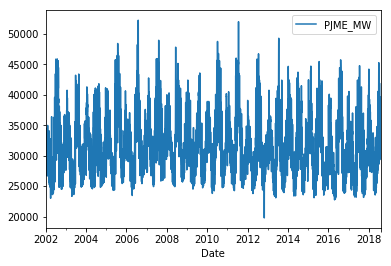

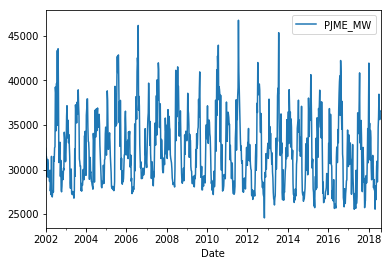

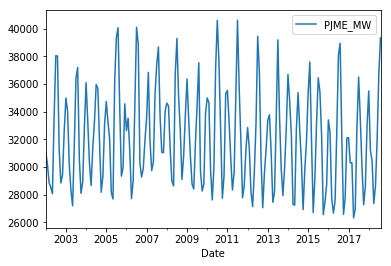

In [147]:
PJME_day.plot()
PJME_week.plot()
PJME_month.plot()

In [ ]:
При сравнение этих графиков, видно, что по дням слишком перегружен как для зрительного анализа, так и для статистического.
В графиках явно отсутствуют тренды, наблюдается гомоскедастичность (разброс дисперсии не сильный), сезонность также отсутствует.
Исходя из чего можно предположить, что ряд является стационарным. Убедимся в этом с помощью теста Дики-Фуллера. Для дня он не
является информативным, так как количество элементов слишком большое, наиболее близок к истине является тест по неделям.

In [136]:
# Посчитаем критейри Дики-Фуллера для разных ресемплов (Дни, недели и месяца)
print(" Критерий Дики-Фуллера для дня: p=%f" % sm.tsa.stattools.adfuller(PJME_day.PJME_MW)[1])
print(" Критерий Дики-Фуллера для недели: p=%f" % sm.tsa.stattools.adfuller(PJME_week.PJME_MW)[1])
print(" Критерий Дики-Фуллера для месяца: p=%f" % sm.tsa.stattools.adfuller(PJME_month.PJME_MW)[1])

 Критерий Дики-Фуллера для дня: p=0.000000
 Критерий Дики-Фуллера для недели: p=0.000000
 Критерий Дики-Фуллера для месяца: p=0.307570


In [141]:
"Для дней: {}, Для недель: {}, Для месяцев: {}".format(len(PJME_day), len(PJME_week), len(PJME_month))

'Для дней: 6059, Для недель: 866, Для месяцев: 200'

In [ ]:
Можно заметить, для дней и недель p-value близок к 0, то есть гипотеза H0 о единичных корнях отклоняется, но принимается
для месяцев. Как можно предположить для месяцев не так много данных (Всего 200 элементов), поэтому получился такой результат.

In [ ]:
Таким образом, мы подтвердили свою гипотезу о том, что ряд является стационарным.